# Google Play Store apps and reviews

### To find the project click [here](https://app.datacamp.com/workspace/w/fec29482-e384-425a-a62b-695e88f9c3fe)
### Index (click to redirect to section)
- [Data loading](#load-the-data)
- [Data cleaning](#data-cleaning)
- [Correcting data types](#correcting-data-types)
- [Exploring app categories](#exploring-app-categories)
- [Distribution of app ratings](#distribution-of-app-ratings)
- [Size and price of an app](#size-and-price-of-an-app)
- ["Relation between app category and app price](#relation-between-app-category-and-app-price)
- [Filter out junk apps](#filter-out-junk-apps)
- [Popularity of paid apps vs free apps](#popularity-of-paid-apps-vs-free-apps)
- [Sentiment analysis of user reviews](#sentiment-analysis-of-user-reviews)

<a id="load-the-data"></a>
## Data loading

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('data//googleplaystore.csv')

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', str(len(apps)))

# Have a look at a random sample of 5 rows
print(apps.head())

Total number of apps in the dataset =  10358
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018   

<a id="data-cleaning"></a>
## Data cleaning

In [2]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

# Print a summary of the apps dataframe
print(apps.describe())

            Rating
count  8893.000000
mean      4.189542
std       0.545452
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


<ipython-input-2-ace6f456ae12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[col] = apps[col].apply(lambda x: x.replace(char, ''))


<a id="correcting-data-types"></a>
## Correcting data types

In [3]:
lst = [index for index, row in apps.iterrows() if row['Installs'] == 'Free']
for i in lst:
    apps.drop(i,axis=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

# Checking dtypes of the apps dataframe
print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


<ipython-input-4-f4ff08c8fbd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps['Installs'] = apps['Installs'].astype(float)
<ipython-input-4-f4ff08c8fbd1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps['Price'] = apps['Price'].astype(float)


<a id="exploring-app-categories"></a>
## Exploring app categories

In [5]:
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'.
num_apps_in_category = apps['Category'].value_counts()
print(num_apps_in_category)

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x=num_apps_in_category.index,  # index = category name
        y=num_apps_in_category.values,  # value = count
        )]

plotly.offline.iplot(data)

Number of categories =  33
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64


<a id="distribution-of-app-ratings"></a>
## Distribution of app ratings

In [6]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x=apps['Rating']
        )]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
    'type': 'line',
    'x0': avg_app_rating,
    'y0': 0,
    'x1': avg_app_rating,
    'y1': 1000,
    'line': {'dash': 'dashdot'}
}]
}

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.187876743139908


<a id="size-and-price-of-an-app"></a>
## Size and price of an app

In [11]:
apps['Size'].replace('Varies with device',np.NaN,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



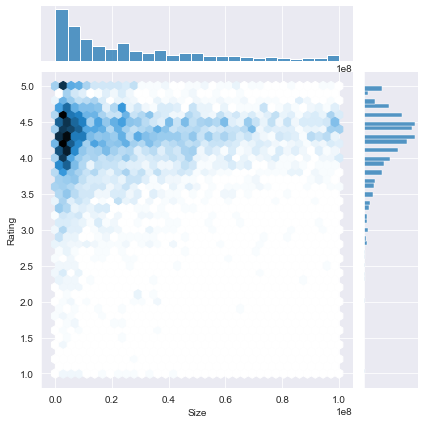

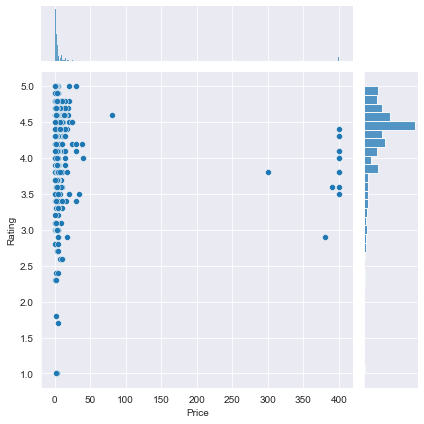

In [24]:
import warnings
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[apps[['Rating']].notnull(
)['Rating'] & apps[['Size']].notnull()['Size']]
apps_with_size_and_rating_present['Size'] = [str((float(i[:-1])*1000000)) if 'M' in i else str((float(i[:-1])*1000)) \
                                             if 'k' in i else i for i in apps_with_size_and_rating_present['Size']]
apps_with_size_and_rating_present['Size'] = apps_with_size_and_rating_present['Size'].astype(float)

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(
    'Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(data=large_categories,
    y='Rating', x='Size', kind='hex')

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(data=paid_apps,x='Price', y='Rating')

<a id="relation-between-app-category-and-app-price"></a>
## Relation between app category and app price

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


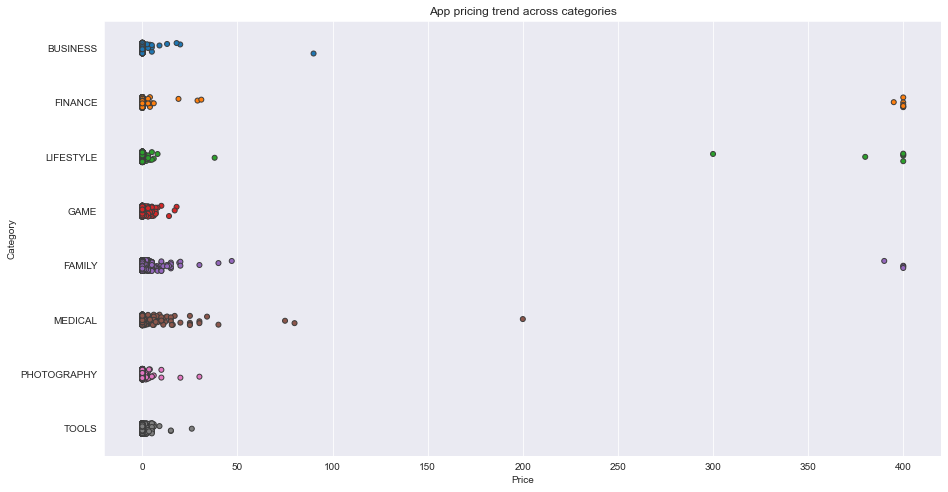

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE', 'BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(
    x=popular_app_cats['Price'], y=popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

<a id="filter-out-junk-apps"></a>
## Filter out junk apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

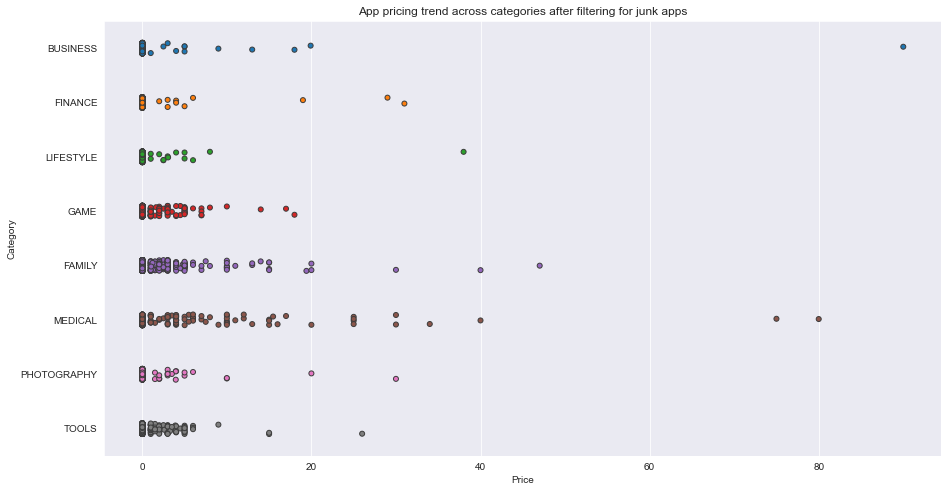

In [26]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x='Price', y='Category',
                   data=apps_under_100, jitter=True, linewidth=1)
ax.set_title(
    'App pricing trend across categories after filtering for junk apps')

<a id="popularity-of-paid-apps-vs-free-apps"></a>
## Popularity of paid apps vs free apps

In [27]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name='Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name='Free'
)

layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(title="Log number of downloads",
               type='log',
               autorange=True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

<a id="sentiment-analysis-of-user-reviews"></a>
## Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

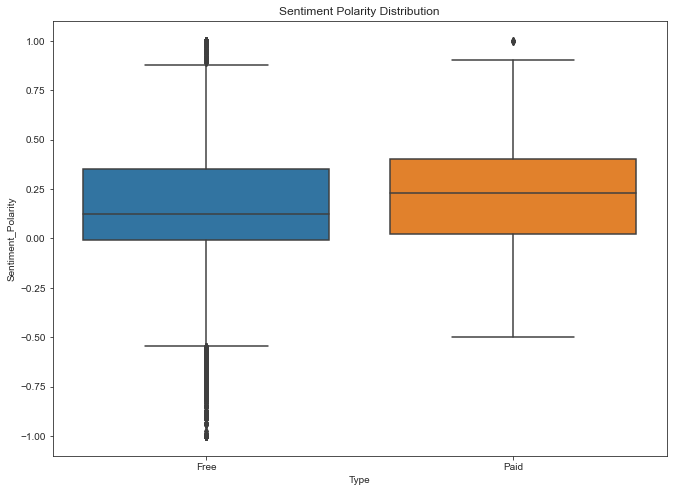

In [28]:
# Load user_reviews.csv
reviews_df = pd.read_csv('data//googleplaystore_user_reviews.csv')

# Join the two dataframes
merged_df = apps.merge(reviews_df,on='App')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
ax.set_title('Sentiment Polarity Distribution')
